## Лабораторная работа №1 | Вариант 5

Выполнила: Леонова Елизавета М8О-310Б-22

### 1. Numpy

In [ ]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [ ]:
m = np.eye(3)
m

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [ ]:
colour_dtype = np.dtype([('red', np.ubyte), ('green', np.ubyte), ('blue', np.ubyte), ('alpha,', np.ubyte)])
colour_dtype

dtype([('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('alpha,', 'u1')])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [ ]:
'''
import warnings
warnings.filterwarnings('ignore')
'''

"\nimport warnings\nwarnings.filterwarnings('ignore')\n"

4. Создайте случайный вектор размера 10 и отсортируйте его

In [ ]:
v = np.random.randint(-763, 482, 10)
np.sort(v)

array([-753, -732, -655, -635, -453, -374, -326, -309, -167,   33])

5. Создайте read-only массив(неизменяемый)

In [ ]:
t = ('t', 'u', 'p', 'l', 'e')
t[2] = '2'

TypeError: 'tuple' object does not support item assignment

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [ ]:
decart = np.random.randint(-30,30,(10,2)) #first column is x, second is y
polar = np.zeros((10,2)) #first column is r, second is phi
for i in range(10) :
    polar[i][0] = np.sqrt(decart[i][0]*decart[i][0]+decart[i][1]*decart[i][1])
    tmp = decart[i][1]/decart[i][0]
    polar[i][1] = np.rad2deg(np.arctan2(decart[i][1], decart[i][0]))
print(decart)
print(polar)

[[-12  18]
 [-12 -15]
 [-17 -21]
 [-17   4]
 [ -8 -28]
 [ 13   6]
 [ -9 -22]
 [ -7  17]
 [  4  21]
 [  9   0]]
[[  21.63330765  123.69006753]
 [  19.20937271 -128.65980825]
 [  27.01851217 -128.99099404]
 [  17.4642492   166.75948008]
 [  29.12043956 -105.9453959 ]
 [  14.31782106   24.77514057]
 [  23.76972865 -112.24902366]
 [  18.38477631  112.38013505]
 [  21.37755833   79.21570213]
 [   9.            0.        ]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [ ]:
coord_dtype = np.dtype([('x', np.float32), ('y', np.float32)])

x, y = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
x = x.reshape(-1)
y = y.reshape(-1)

coords = np.zeros(x.shape, dtype=coord_dtype)
coords['x'] = x
coords['y'] = y

coords

array([(0.        , 0.        ), (0.11111111, 0.        ),
       (0.22222222, 0.        ), (0.33333334, 0.        ),
       (0.44444445, 0.        ), (0.5555556 , 0.        ),
       (0.6666667 , 0.        ), (0.7777778 , 0.        ),
       (0.8888889 , 0.        ), (1.        , 0.        ),
       (0.        , 0.11111111), (0.11111111, 0.11111111),
       (0.22222222, 0.11111111), (0.33333334, 0.11111111),
       (0.44444445, 0.11111111), (0.5555556 , 0.11111111),
       (0.6666667 , 0.11111111), (0.7777778 , 0.11111111),
       (0.8888889 , 0.11111111), (1.        , 0.11111111),
       (0.        , 0.22222222), (0.11111111, 0.22222222),
       (0.22222222, 0.22222222), (0.33333334, 0.22222222),
       (0.44444445, 0.22222222), (0.5555556 , 0.22222222),
       (0.6666667 , 0.22222222), (0.7777778 , 0.22222222),
       (0.8888889 , 0.22222222), (1.        , 0.22222222),
       (0.        , 0.33333334), (0.11111111, 0.33333334),
       (0.22222222, 0.33333334), (0.33333334, 0.33333334

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [ ]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
C = [[1/(x[i]-y[j]) for j in range(5)] for i in range(5)]

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [ ]:
float_array = np.array([35.6222, 561.445, -223.568])
int_array = float_array.astype(int, copy=False)
int_array

array([  35,  561, -223])

10. Как случайно заменить p элементов в 2D массиве?

In [ ]:
x = np.array([[ 1., 2., 3.], [ 4., 5., 6.], [ 7., 8., 9.]])
mask = np.random.randint(0,2,size=x.shape).astype(np.bool)
r = np.random.rand(*x.shape)*np.max(x)
x[mask] = r[mask]

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ml_mai/data.csv')

1. Узнайте сколько было на борту человек

In [ ]:
df.shape[0]

891

2. Какой медианный и средний возраста пассажиров

In [ ]:
print('Медианный возраст: ', df['Age'].mean())
print('Средний возраст', df['Age'].median())

Медианный возраст:  29.69911764705882
Средний возраст 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [ ]:
print('Процент выживаемости детей: ', end = '')
print(df[(df['Age']>16) & (df['Survived']==1)]['Age'].count()/df[df['Age']>16]['Age'].count()*100)
print('Процент выживаемости взрослых: ', end = '')
print(df[(df['Age']<=16) & (df['Survived']==1)]['Age'].count()/df[df['Age']<=16]['Age'].count()*100)

Процент выживаемости детей: 38.273615635179155
Процент выживаемости взрослых: 55.00000000000001


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [ ]:
print('Процент выживаемости женщин и детей: ', end = '')
print(df[((df['Age']<=16) | ((df['Sex']=='female') & (df['Age']>16))) & df['Survived']==1]['Age'].count()/df[(df['Age']<=16) | ((df['Sex']=='female') & (df['Age']>16))]['Age'].count()*100)
print('Процент выживаемости мужчин: ', end = '')
print(df[((df['Sex']=='male') & (df['Age']>16)) & df['Survived']==1]['Age'].count()/df[(df['Sex']=='male') & (df['Age']>16)]['Age'].count()*100)
print('-> Гипотеза верна')

Процент выживаемости женщин и детей: 70.1923076923077
Процент выживаемости мужчин: 17.66169154228856
->Гипотеза верна


5. Зависит ли выживаемость от класса обслуживания?

In [ ]:
print(df.groupby(['Pclass','Survived'])['PassengerId'].count())
print('Процент выживаемости пассажиров 1 класса: ', 136/(136+80)*100)
print('Процент выживаемости пассажиров 2 класса: ', 87/(97+87)*100)
print('Процент выживаемости пассажиров 3 класса: ', 119/(119+372)*100)
print('-> Выживаемость зависит от класса обслуживания: у 3 класса выживаемость наименьшая, а у 1 класса - наибольшая')

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64
Процент выживаемости пассажиров 1 класса:  62.96296296296296
Процент выживаемости пассажиров 2 класса:  47.28260869565217
Процент выживаемости пассажиров 3 класса:  24.236252545824847
->Выживаемость зависит от класса обслуживания: у 3 класса выживаемость наименьшая, а у 1 класса - наибольшая


6. Посчитайте средний возраст умерших женщин и мужчин

In [ ]:
df[df['Survived']==0].groupby('Sex')['Age'].mean()

,Age
Sex,
female,25.046875
male,31.618056


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [ ]:
print('Процент выживаемости одиночек: ', end='')
print(df[(df['Parch']==0) & (df['SibSp']==0) & (df['Survived']==1)]['PassengerId'].count()/df[(df['Parch']==0) & (df['SibSp']==0)]['PassengerId'].count()*100)
print('Процент выживаемости пассажиров с хотя бы с одним родственником: ', end='')
print(df[((df['Parch']==1) | (df['SibSp']==0)) & (df['Survived']==1)]['PassengerId'].count()/df[(df['Parch']==1) | (df['SibSp']==0)]['PassengerId'].count()*100)
print('-> Пассажиры с хотя бы с одним родственником выживали чаще')

Процент выживаемости одиночек: 30.353817504655495
Процент выживаемости пассажиров с хотя бы с одним родственником: 36.337209302325576
->Пассажиры с хотя бы с одним родственником выживали чаще


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [ ]:
print('Средняя стоимость билета у умерших пассажиров', df[df['Survived']==0]['Fare'].mean())
print('Средняя стоимость билета у выживших пассажиров', df[df['Survived']==1]['Fare'].mean())
print('-> У выживших средняя стоимость билета выше')

Средняя стоимость билета у умерших пассажиров 22.117886885245902
Средняя стоимость билета у выживших пассажиров 48.39540760233918
->У выживших средняя стоимость билета выше


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [ ]:
df[(df['Pclass']==2)&(df['Survived']==1)]['Age'].max(), df[(df['Pclass']==2)&(df['Survived']==1)]['Age'].min()

(62.0, 0.67)

10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [ ]:
print('Примем мужчин 45 лет и старше за более взрослых')
print('Процент выживаемости молодых мужчин: ', end='')
print(df[(df['Survived']==1)&(df['Sex']=='male')&(df['Age']>=18)&(df['Age']<45)]['PassengerId'].count()/df[(df['Sex']=='male')&(df['Age']>=18)&(df['Age']<45)]['PassengerId'].count()*100)
print('Процент выживаемости более взрослых: ', end='')
print(df[(df['Survived']==1)&(df['Sex']=='male')&(df['Age']>=45)]['PassengerId'].count()/df[(df['Sex']=='male')&(df['Age']>=45)]['PassengerId'].count()*100)
print('-> Выживаемость молодых и взрослых мужчин одинакова')

Примем мужчин 45 лет и старше за более взрослых
Процент выживаемости молодых мужчин: 17.72151898734177
Процент выживаемости более взрослых: 17.72151898734177
-> Выживаемость молодых и взрослых мужчин одинакова


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [79]:
import matplotlib.pyplot as plt

1. Постройте гистограмму распределения возростов пассажиров

<Axes: ylabel='Quantity'>

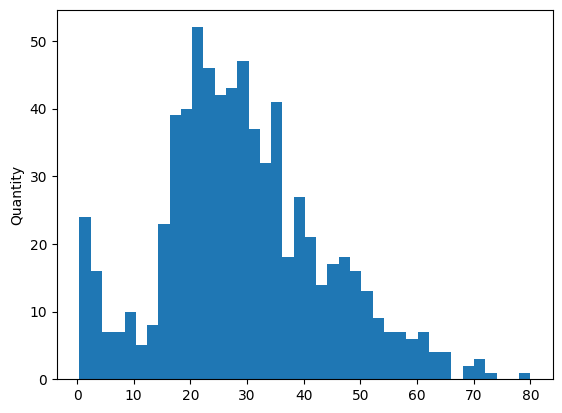

In [82]:
df['Age'].plot(kind='hist', bins=40, ylabel='Quantity')

2. Постройте гистограммы распределения цен для пассажиров разных классов

,Fare
Pclass,
1,"Axes(0.125,0.11;0.775x0.77)"
2,"Axes(0.125,0.11;0.775x0.77)"
3,"Axes(0.125,0.11;0.775x0.77)"


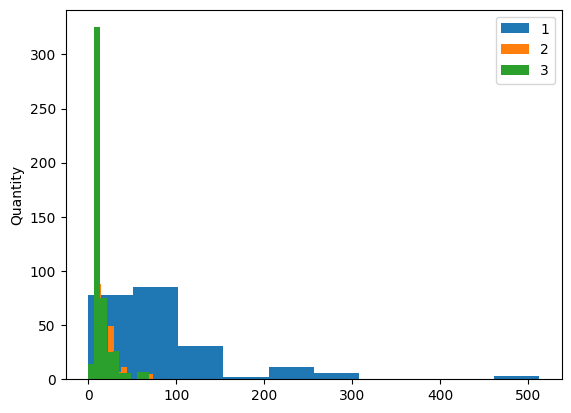

In [84]:
df.groupby('Pclass')['Fare'].plot(kind='hist', legend = True, ylabel='Quantity')

3. Постройте зависимость цены от возраста пассажира

<Axes: xlabel='Age', ylabel='Fare'>

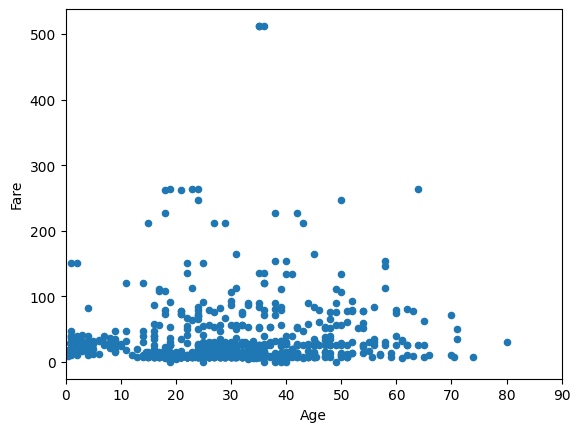

In [ ]:
df.plot(x='Age', y='Fare', kind='scatter', xlim=[0,90])

4. Постройте box plot отображающий распределение цен на билеты в разных классах

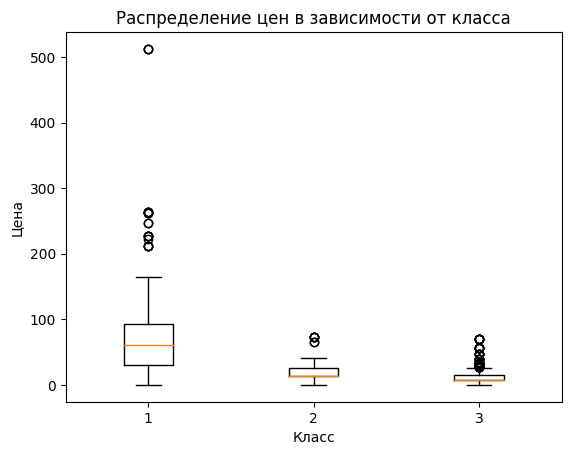

In [75]:
df1 = df[df["Pclass"] == 1]["Fare"]
df2 = df[df["Pclass"] == 2]["Fare"]
df3 = df[df["Pclass"] == 3]["Fare"]
plt.boxplot([df1, df2, df3])
plt.title('Распределение цен в зависимости от класса')
plt.ylabel('Цена')
plt.xlabel('Класс')
plt.show()

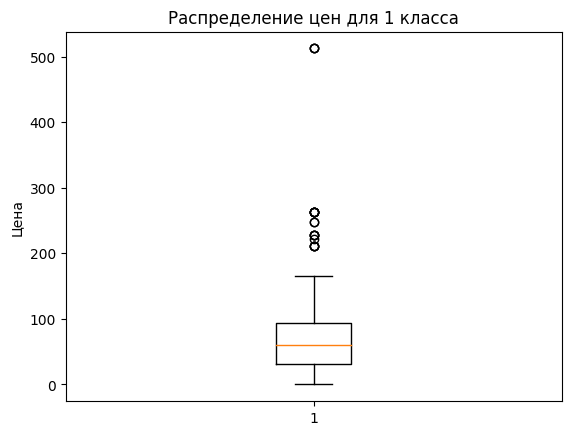

In [76]:
plt.boxplot(df1)
plt.title('Распределение цен для 1 класса')
plt.ylabel('Цена')
plt.show()

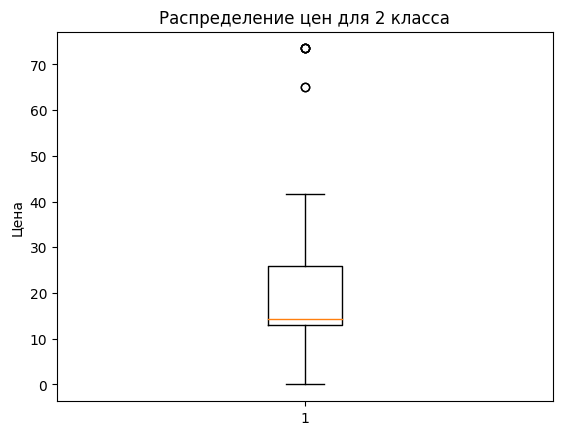

In [77]:
plt.boxplot(df2)
plt.title('Распределение цен для 2 класса')
plt.ylabel('Цена')
plt.show()

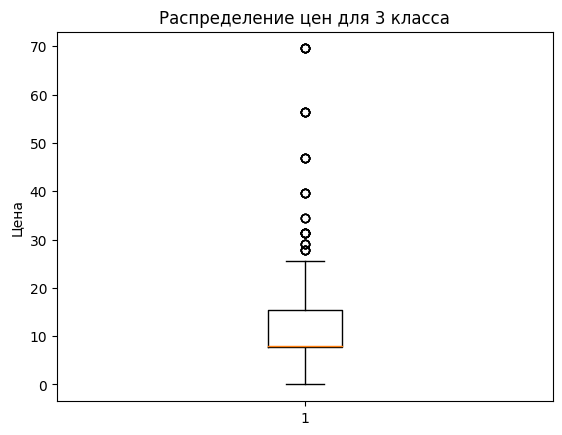

In [78]:
plt.boxplot(df3)
plt.title('Распределение цен для 3 класса')
plt.ylabel('Цена')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

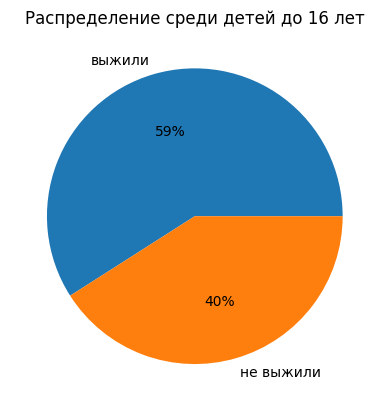

In [102]:
children = [df[(df['Age']<16)&(df['Survived']==1)]['PassengerId'].count(), df[(df['Age']<16)&(df['Survived']==0)]['PassengerId'].count()]
plt.pie(children, labels=['выжили', 'не выжили'], autopct='%1i%%')
plt.title('Распределение среди детей до 16 лет')
plt.show()

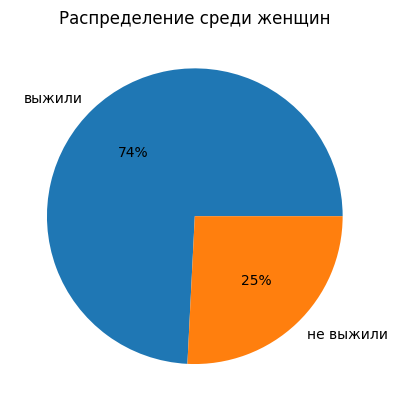

In [100]:
female = [df[(df['Sex']=='female')&(df['Survived']==1)]['PassengerId'].count(), df[(df['Sex']=='female')&(df['Survived']==0)]['PassengerId'].count()]
plt.pie(female, labels=['выжили', 'не выжили'], autopct='%1i%%')
plt.title('Распределение среди женщин')
plt.show()

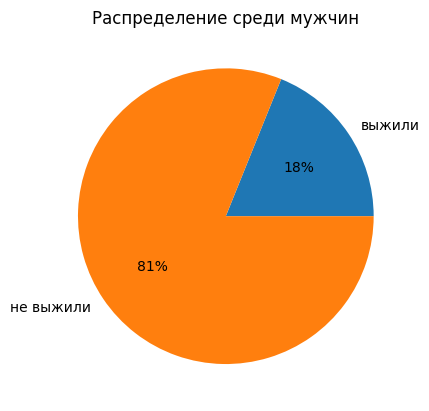

In [101]:
male = [df[(df['Sex']=='male')&(df['Survived']==1)]['PassengerId'].count(), df[(df['Sex']=='male')&(df['Survived']==0)]['PassengerId'].count()]
plt.pie(male, labels=['выжили', 'не выжили'], autopct='%1i%%')
plt.title('Распределение среди мужчин')
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

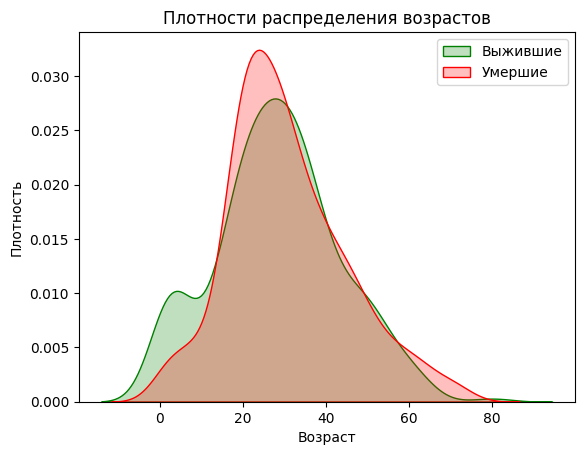

-> Дети в большей степени выжили, старые в большей степени погибли
-> Наибольшее количество умерших людей были от 20 до 30 лет


In [103]:
import seaborn as sns
sns.kdeplot(df[df['Survived'] == 1]['Age'], fill=True, label='Выжившие', color='green')
sns.kdeplot(df[df['Survived'] == 0]['Age'], fill=True, label='Умершие', color='red')
plt.title('Плотности распределения возрастов')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.show()
print('-> Дети в большей степени выжили, старые в большей степени погибли\n-> Наибольшее количество умерших людей были от 20 до 30 лет')

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл